In [6]:
%load_ext autoreload
%autoreload 2

from parameters import *
from SCN_model import SCN
from population import Population
from inputs import SinusoidalCurrentInput
import graphing
import matplotlib.pyplot as plt
import numpy as np

4


In [14]:
params = default_params()
T = params.duration
N = params.n_neurons
print(N)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
pop = Population(params)
inp = SinusoidalCurrentInput(n_neurons = 1, amplitudes = [1.0], angularVelocity=1/500)

r = np.array(int(N/2)*[[0.1]]+int(N/2)*[[-0.1]]).T
# r = np.array([[0.1]])
pop.addConnection(node=inp, weights=r, plastic=False)

if not params.learning:
    w_init = - r.T @ r
#pop.addReccurence(weights = w)
else:
    w_init = - 0.001*np.random.rand(N,N) - 0.005*np.eye(N,N)
pop.addConnection(node=pop, weights=w_init, plastic=params.learning)
pop.addOutput(r, 1)

net = SCN(params)
net.addPopulations([pop])
net.addInputs([inp])
net.initialise()

net()

print("done simulation")
print(pop.Vt[0,0:2])

Successfully added connection from input node to pop node.
Successfully added connection from pop node to pop node.
Successfully added output from pop
0.005050000000000001
0.005050000000000001
0.005050000000000001
0.005050000000000001
Successfully added connection from pop node to pop node.
0.005050000000000001
0.005050000000000001
0.005050000000000001
0.005050000000000001
Successfully added connection from pop node to pop node.
done simulation
[0. 0.]


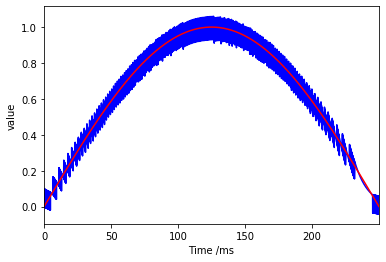

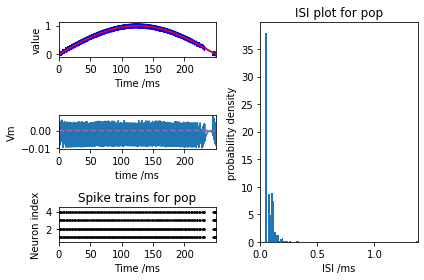

In [18]:
t = np.arange(0, params.duration, params.timestep)
fig = plt.figure()

graphing.plotOutputInput(inp.x, pop.output, t, fig.gca())

#plt.plot(pop.fastConnections[pop.name].weightHistory[0,:], pop.fastConnections[pop.name].weightHistory[1])
fig = plt.figure()

ax = fig.add_subplot(321)
graphing.plotOutputInput(inp.x, pop.output, t, ax)

ax2 = fig.add_subplot(323)
for v in pop.Vm[:1]:
    ax2.set_xlim(0, t[-1])
    ax2.plot(t, v)
    ax2.set_xlabel("time /ms")
    ax2.set_ylabel("Vm")

for T in pop.Vt:
    ax2.plot(t, T, '--')

ax3 = fig.add_subplot(325)
graphing.plotSpiketrains(pop, ax3, t)

ax4 = fig.add_subplot(122)
graphing.plotISI(pop, ax=ax4)

plt.tight_layout()
plt.show()